In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 데이터 로드
df = pd.read_csv(r'C:\skproject\pyproject\winequality-red.csv')

# 주요 특성 선택 (quality는 제외)
features = df.columns.drop('quality')
X = df[features]

# 정규화 (StandardScaler 사용)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
from sklearn.cluster import KMeans

# 클러스터 수 3으로 설정
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# 클러스터 레이블 추가
df['cluster'] = clusters


In [23]:
# 클러스터별 특성 평균
cluster_means = df.groupby('cluster')[features].mean()

# 클러스터별 품질(quality) 평균
quality_means = df.groupby('cluster')['quality'].mean()

# 클러스터별 품질 분포
quality_dist = df.groupby('cluster')['quality'].value_counts().unstack().fillna(0)


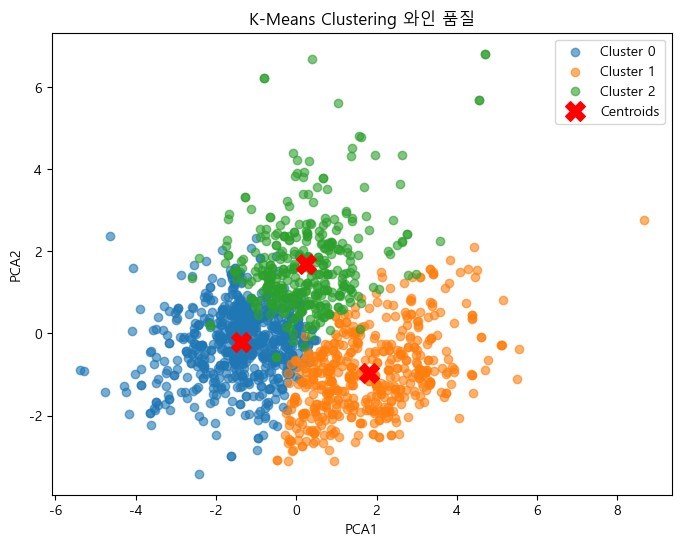

In [24]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

plt.rcParams['font.family'] = 'Malgun Gothic'    
plt.rcParams['axes.unicode_minus'] = False 

# 2차원 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# K-Means 센트로이드도 같은 PCA로 변환
centroids_pca = pca.transform(kmeans.cluster_centers_) 

# 시각화
plt.figure(figsize=(8,6))
for cluster in range(3):
    plt.scatter(X_pca[df['cluster']==cluster, 0], X_pca[df['cluster']==cluster, 1], label=f'Cluster {cluster}', alpha=0.6)
# 센트로이드 그리기
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=200, c='red', marker='X', label='Centroids')  

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('K-Means Clustering 와인 품질')
plt.legend()
plt.show()


In [25]:
df.groupby('cluster').mean()

df.groupby('cluster')['quality'].value_counts()

cluster  quality
0        6          304
         5          303
         7           63
         4           38
         3            7
         8            7
1        6          223
         5          135
         7          122
         8           10
         4            9
         3            3
2        5          243
         6          111
         7           14
         4            6
         8            1
Name: count, dtype: int64

- **Cluster 0**  
  - 5~6점 와인이 많다
  - **가장 전형적인 '평범한 레드와인' 특성을 가진 그룹**이라고 볼 수 있다

- **Cluster 1**  
  - 6점 이상(7점, 8점) 와인 비율이 높다
  - 5~6점도 다수 있지만, **고품질(7점 이상) 와인이 전체의 약 1/3 이상 포함**되어 있다
  - 즉, **화학적 특성이 뛰어난 '고품질 와인' 클러스터**라고 해석 가능하다

- **Cluster 2**  
  - 5~6점 와인 비율이 높다
  - 7점 이상 고득점 와인은 극히 드물다.
  - **'저품질~보통 와인'이 많은 그룹**.

---

**결론:**  
K-Means 클러스터링 결과,  
- 각 클러스터는 실제 와인 품질 점수(quality)와 어느 정도 연관성이 있다.  
- 특히 Cluster 1은 고품질 와인이 많이 모이고,  
- Cluster 0과 2는 보통~저품질 와인이 주로 분포하지만 **비슷한 품질이어도 맛과 풍미가 다를 수 있는,  
  서로 다른 스타일의 평범한 와인 그룹**임을 알 수 있다.

**화학적 특성 기반 클러스터링으로 품질 등급을 구분할 수 있다**


# 깃허브 연동